In [1]:
# 读取数据集
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("d:/torchtrain/data/america/US_Accidents_Dec20_Updated.csv")

In [2]:
#先大致浏览数据集总体概况
df.info()
# 范围索引：2906610 个条目，0 到 2906609
# 数据列（共47列）：
#  # 列数据类型
# --- ------ -----
#  0 身份证
#  1 严重性
#  2 开始时间
#  3 结束时间
#  4 开始纬度
#  5 开始
#  6 结束纬度
#  7 结束语
#  8 距离(mi)
#  9 说明
#  10号
#  11街
#  12边
#  13城
#  14县
#  15 状态
#  16 邮政编码
#  17 国家
#  18 时区
#  19 机场代码
#  20 天气时间戳
#  21 温度(F)
#  22 风寒(女)
#  23 湿度(%)
#  24 压力（英寸）
#  25 能见度（英里）
#  26 风向
#  27 风速(mph)
#  28 降水量(in)
#  29 天气状况
#  30 便利设施
#  31 凹凸
#  32 穿越
#  33 让路
#  34路口
#  35 无出口
#  36铁路
#  37 回旋处
#  38站
#  39 停止
#  40 交通平静
#  41 交通信号
#    转圈
#  43日出日落
#    民用暮光
#  45 航海黄昏
#   天文黄昏  County  City

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [3]:
# 计算出每个特征的缺失比例和缺失数量
number_missing=df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({
    'column_name': df.columns,
    'number_missing':number_missing,
    'percent_missing': percent_missing
})
# 查看Top5缺失的
missing_value_df.sort_values(by='percent_missing', ascending=False).head(20)

,column_name,number_missing,percent_missing
Number,Number,1891672,65.081728
Precipitation(in),Precipitation(in),1301326,44.771263
Wind_Chill(F),Wind_Chill(F),1183859,40.729888
Wind_Speed(mph),Wind_Speed(mph),307163,10.567740
End_Lat,End_Lat,282821,9.730270
End_Lng,End_Lng,282821,9.730270
Visibility(mi),Visibility(mi),72078,2.479796
Weather_Condition,Weather_Condition,71851,2.471986
Humidity(%),Humidity(%),71270,2.451997
Temperature(F),Temperature(F),67224,2.312797


<AxesSubplot:>

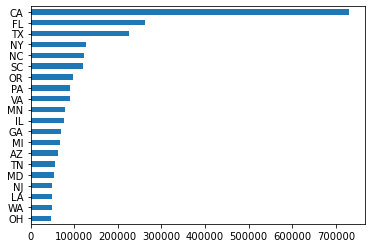

In [4]:
#通过条形图展示发生事故前20多的州，其中发生事故最多的是CA
df['State'].value_counts().sort_values(ascending=True)[-20:].plot.barh()

<AxesSubplot:>

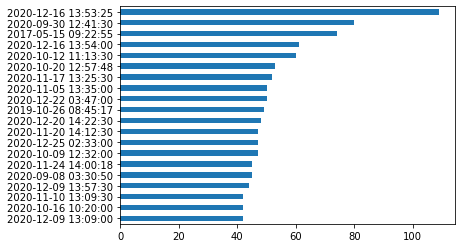

In [5]:
#同样展示方式在时间段上是行不通的，因为该数据的时间粒度为秒钟
df['Start_Time'].value_counts().sort_values(ascending=True)[-20:].plot.barh()

In [6]:
#按不同的时间粒度来保存数据，按月
df['Start_Time'][0][5:-12]

'05'

In [7]:
#按不同的时间粒度来保存数据，按年月
df['Start_Time'][0][:-12]

'2019-05'

In [33]:
#按不同的时间粒度来保存数据，按年
df['Start_Time'][0][:4]

'2019'

In [8]:
#按不同的时间粒度来保存数据，按月日
df['Start_Time'][0][5:-9]

'05-21'

In [45]:
YM=[]
for i in df['Start_Time']:
    YM.append(i[:-12])
YM

['2019-05',
 '2019-10',
 '2020-12',
 '2018-04',
 '2016-08',
 '2018-10',
 '2019-12',
 '2019-12',
 '2018-05',
 '2019-01',
 '2019-12',
 '2020-12',
 '2018-04',
 '2017-08',
 '2020-05',
 '2019-04',
 '2016-07',
 '2020-11',
 '2020-12',
 '2020-04',
 '2020-08',
 '2018-10',
 '2018-02',
 '2019-05',
 '2020-06',
 '2018-01',
 '2017-09',
 '2018-12',
 '2020-06',
 '2019-11',
 '2020-12',
 '2018-11',
 '2018-01',
 '2017-10',
 '2018-09',
 '2016-07',
 '2019-11',
 '2019-02',
 '2020-05',
 '2020-12',
 '2020-10',
 '2019-11',
 '2020-11',
 '2016-12',
 '2020-01',
 '2019-12',
 '2019-03',
 '2018-06',
 '2018-01',
 '2020-11',
 '2020-11',
 '2020-05',
 '2020-11',
 '2020-10',
 '2018-07',
 '2019-11',
 '2020-06',
 '2016-05',
 '2020-03',
 '2019-09',
 '2018-11',
 '2018-09',
 '2020-12',
 '2018-02',
 '2020-11',
 '2020-04',
 '2019-04',
 '2017-04',
 '2017-08',
 '2019-09',
 '2018-05',
 '2018-05',
 '2016-06',
 '2017-05',
 '2016-10',
 '2020-11',
 '2020-09',
 '2019-04',
 '2016-09',
 '2019-06',
 '2020-10',
 '2017-05',
 '2020-06',
 '20

In [46]:
#按照年月来统计
from collections import Counter
countYM = Counter(YM)
print(countYM)
#这里可以2020年的第四季度，美国事故数极端的高

Counter({'2020-12': 190172, '2020-11': 163296, '2020-10': 110322, '2020-06': 84341, '2019-10': 76156, '2020-04': 75728, '2020-05': 74958, '2019-12': 71947, '2020-03': 69256, '2020-01': 67440, '2020-09': 64980, '2019-09': 62706, '2020-02': 62131, '2018-10': 52690, '2019-11': 51877, '2018-11': 50516, '2019-01': 48973, '2017-08': 47969, '2019-08': 47353, '2019-02': 46729, '2018-01': 45628, '2018-12': 45568, '2018-08': 45023, '2017-09': 44583, '2019-05': 44530, '2018-09': 44514, '2019-04': 44285, '2018-05': 44214, '2018-03': 44132, '2017-10': 43784, '2018-02': 42855, '2017-12': 42782, '2019-03': 42394, '2018-04': 42193, '2016-11': 41917, '2017-11': 41466, '2019-07': 41295, '2018-06': 39616, '2019-06': 39466, '2016-12': 39271, '2018-07': 38972, '2017-03': 37834, '2016-08': 37362, '2016-10': 36738, '2017-01': 36443, '2016-09': 34934, '2017-02': 34180, '2017-04': 31243, '2017-06': 30754, '2016-07': 30654, '2017-05': 28716, '2017-07': 28514, '2016-06': 20380, '2020-08': 18857, '2020-07': 17668

In [67]:
mb=[]
for i in countYM.keys():
    if len(i)<8:
        mb.append(i)
mb
        

['2019-05',
 '2019-10',
 '2020-12',
 '2018-04',
 '2016-08',
 '2018-10',
 '2019-12',
 '2018-05',
 '2019-01',
 '2017-08',
 '2020-05',
 '2019-04',
 '2016-07',
 '2020-11',
 '2020-04',
 '2020-08',
 '2018-02',
 '2020-06',
 '2018-01',
 '2017-09',
 '2018-12',
 '2019-11',
 '2018-11',
 '2017-10',
 '2018-09',
 '2019-02',
 '2020-10',
 '2016-12',
 '2020-01',
 '2019-03',
 '2018-06',
 '2018-07',
 '2016-05',
 '2020-03',
 '2019-09',
 '2017-04',
 '2016-06',
 '2017-05',
 '2016-10',
 '2020-09',
 '2016-09',
 '2019-06',
 '2017-12',
 '2018-03',
 '2017-03',
 '2017-11',
 '2016-04',
 '2020-02',
 '2019-08',
 '2016-11',
 '2017-01',
 '2018-08',
 '2019-07',
 '2017-06',
 '2017-07',
 '2016-03',
 '2017-02',
 '2020-07',
 '2016-02']

<BarContainer object of 59 artists>

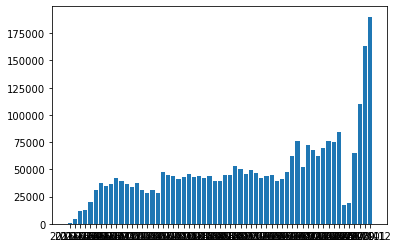

In [68]:
plt.bar(sorted(mb),[countYM[i] for i in sorted(mb)], label='by year')

In [65]:
#按照月来统计
M=[]
for i in df['Start_Time']:
    x=i[5:-12]
    M.append(x)
M

countM = Counter(M)

print(countM)
#可以看出第四季度的事故率一直是保持很高的，可能是因为天气寒冷，道理湿滑

Counter({'12': 389740, '11': 349072, '10': 319690, '09': 251717, '06': 214557, '04': 205486, '05': 204889, '01': 198484, '03': 197968, '08': 196564, '02': 186660, '07': 157103, '12-16 13:53:': 9, '09-30 12:41:': 8, '12-14 01:11:': 7, '11-25 23:46:': 7, '09-15 13:34:': 7, '12-01 23:03:': 7, '12-29 01:46:': 7, '11-24 14:02:': 7, '10-05 13:17:': 7, '10-16 12:17:': 6, '12-23 13:21:': 6, '12-10 02:05:': 6, '12-14 03:37:': 6, '12-15 02:32:': 6, '12-14 19:37:': 6, '10-20 12:57:': 6, '11-05 13:35:': 6, '10-19 12:55:': 6, '11-20 14:12:': 6, '11-10 13:09:': 5, '10-02 11:13:': 5, '10-15 13:08:': 5, '09-28 23:13:': 5, '11-25 14:37:': 5, '11-13 14:20:': 5, '12-22 12:29:': 5, '10-16 11:56:': 5, '11-12 02:22:': 5, '12-23 12:58:': 5, '12-22 12:44:': 5, '09-14 17:56:': 5, '12-18 03:16:': 5, '11-19 00:30:': 5, '09-15 13:29:': 5, '12-16 13:59:': 5, '12-09 13:57:': 5, '11-13 12:46:': 5, '12-01 13:20:': 5, '09-12 11:36:': 5, '12-30 02:27:': 5, '12-23 23:42:': 5, '10-27 13:22:': 5, '12-29 12:57:': 5, '10-12

In [70]:
#按照年来统计
Y=[]
for i in df['Start_Time']:
    x=i[:4]
    Y.append(x)
Y

countY = Counter(Y)
print(count)
#根据按照年的统计数据，可以看出

Counter({'2020': 1033828, '2019': 617712, '2018': 535921, '2017': 448268, '2016': 270881})


<BarContainer object of 5 artists>

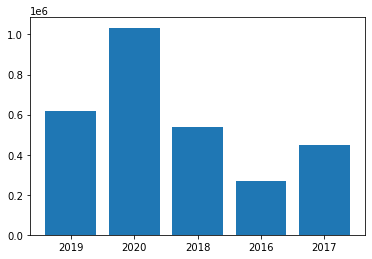

In [71]:
import matplotlib.pyplot as plt
plt.bar(countY.keys(),countY.values(), label='by year')
#根据按照年的统计数据，可以看出事故的数量逐年增加，2020年的事故率是其他年份的两倍，是2016年的三倍
#并且可以总结到事故数量逐年增加，并且每年的第四季度的事故量为当年之最。

<AxesSubplot:title={'center':'Correlation Heatmap'}>

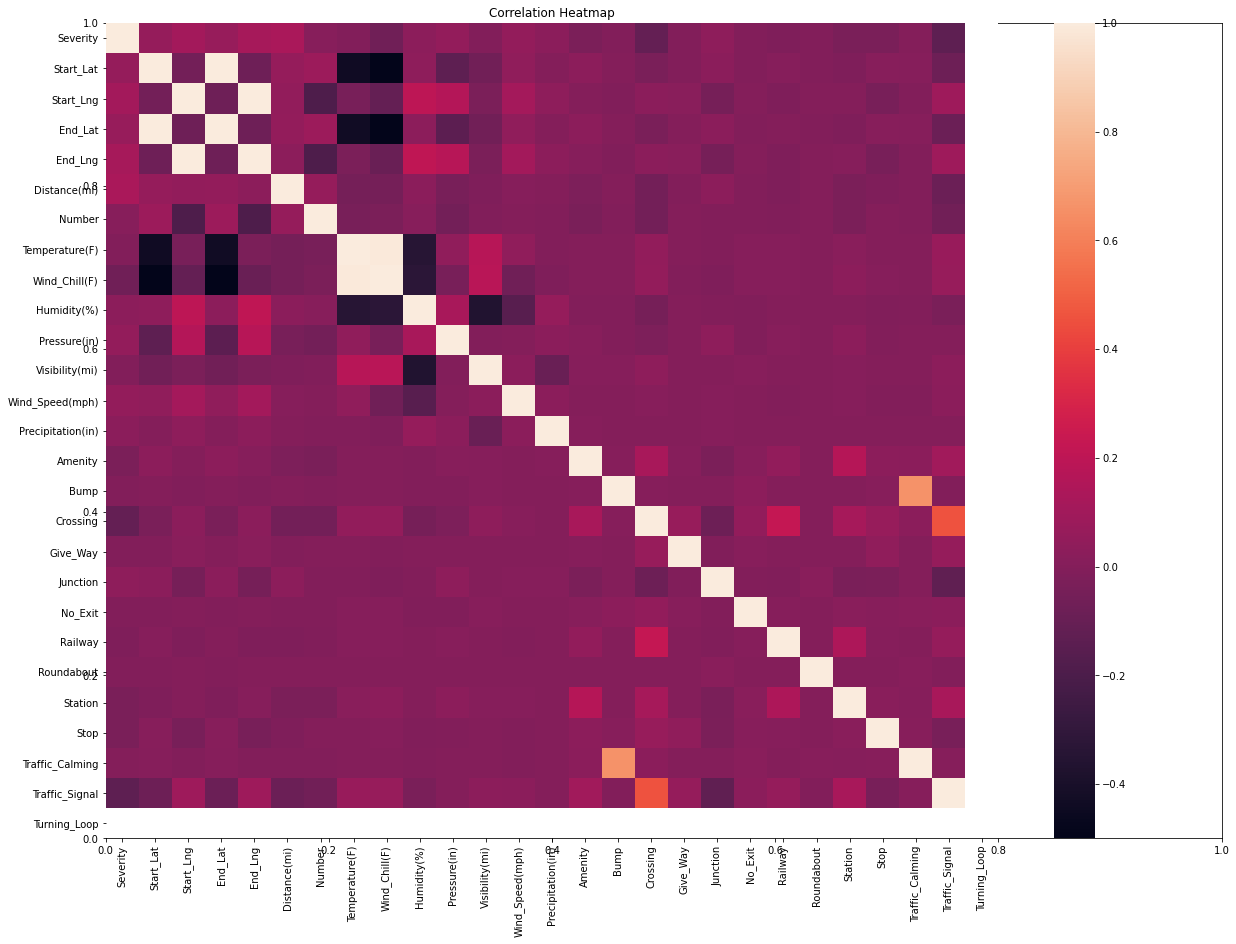

In [41]:
# 相关性热力图分析
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
#通过热力图来探索影响事故严重程度的因素，这里的颜色越浅代表了两个对应的属性的相关程度
#比如风速，湿度，距离，可见度，junction等等是影响事故严重程度的因素比较重要的隐速。

In [53]:
sorted(mb)

['2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09',
 '2019-10',
 '2019-11',
 '2019-12',
 '2020-01',
 '2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10',
 '2020-11',
 '2020-12']

<BarContainer object of 59 artists>

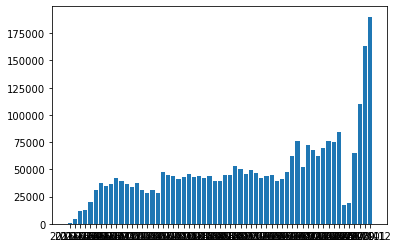

In [60]:
#通过柱状图来展示讲述4年间美国发生事故的总体情况
plt.bar(sorted(mb),[countYM[i] for i in sorted(mb)], label='by year')

#美国事故发生数量按年，按月逐步递增，每年的尤其是2020的年的12月，爆发式增加

<BarContainer object of 5 artists>

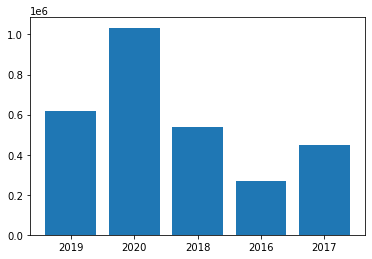

In [72]:
plt.bar(countY.keys(),countY.values(), label='by year')

<AxesSubplot:>

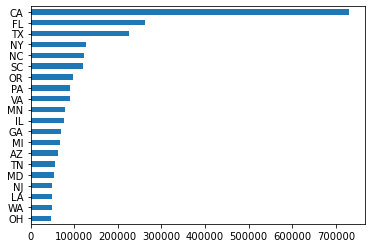

In [73]:
df['State'].value_counts().sort_values(ascending=True)[-20:].plot.barh()

<AxesSubplot:>

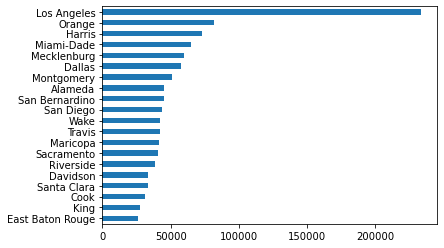

In [74]:
df['County'].value_counts().sort_values(ascending=True)[-20:].plot.barh()

<AxesSubplot:>

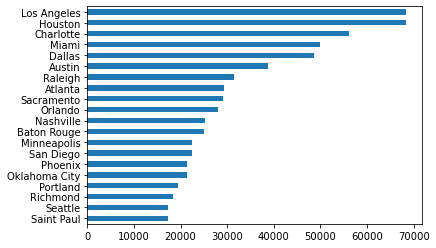

In [75]:
df['City'].value_counts().sort_values(ascending=True)[-20:].plot.barh()